In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from os.path import join
from os import environ

In [2]:
Autoencoder = tf.keras.models.load_model('k_fold_best_model_new_architecture_test3')

In [3]:
home=environ['HOME']
folder1='GRIMech_CH4_models_RS3_15_trajectories'
folder2='Datasets'

cantera_species=pd.read_csv(join(home, folder1,folder2,'State_space_cte_pressure_T1418_st-quarter_phi_10.csv'))
cantera_species=pd.DataFrame(cantera_species)

cantera_sources=pd.read_csv(join(home,folder1,folder2,'Reaction_rates_cte_pressure_T1418_st-quarter_phi_10.csv'))
cantera_sources=pd.DataFrame(cantera_sources)

maximum_values=pd.read_csv(join(home,folder1,folder2,'maximum_values_T1418.csv'))
maximum_values=pd.DataFrame(maximum_values)

In [4]:
def hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values):
    cantera_sources=cantera_sources.add_suffix('w')
    cantera_sources=cantera_sources.iloc[:,1:] #for taking out the timestep as data 
    
    cantera_time=cantera_species.iloc[:,1]
    cantera_temperature=cantera_species.iloc[:,2]
    cantera_pressure=cantera_species.iloc[:,3]
    
    cantera_species_fractions=cantera_species.iloc[:,4:]
    print(np.shape(cantera_species_fractions))
    
    cantera_species_fractions=cantera_species_fractions.loc[:,(cantera_species!=0).any(axis=0)]
    cantera_species_fractions=cantera_species_fractions.loc[:, (cantera_species != cantera_species.iloc[0]).any()]
    print(np.shape(cantera_species_fractions))
    
    n_columns_mass_fraction=np.shape(cantera_species_fractions)[1]
    print(n_columns_mass_fraction)
    
    cantera_sources=cantera_sources.loc[:,(cantera_sources!=0).any(axis=0)]
    cantera_sources=cantera_sources.loc[:, (cantera_sources != cantera_sources.iloc[0]).any()]
    
    print(np.shape(cantera_sources))
    n_columns_source=np.shape(cantera_sources)[1]
    print(n_columns_source)
    
    cantera_data=pd.concat([cantera_time, cantera_temperature,cantera_species_fractions,cantera_sources],axis=1)

    maximum_values=maximum_values.iloc[:,1:]
    maximum_values=pd.concat([maximum_values.iloc[:,0:2],maximum_values.iloc[:,3:]],axis=1)
    #print(maximum_values)
    
    maximum_values=maximum_values.to_numpy()
    #print(np.shape(maximum_values))
    
    iterations=np.shape(cantera_data)[1]
    
    #cantera_data.divide(maximum_values)
    for j in range(iterations):
        cantera_data.iloc[:,j]=cantera_data.iloc[:,j]/(maximum_values[0,j])
        #print(maximum_values[0,j])
    
    cantera_data_shift=cantera_data.loc[1:,:]
    cantera_data_shift=cantera_data_shift.add_suffix('shift')
    
    cantera_data=cantera_data.reset_index()
    cantera_data_shift=cantera_data_shift.reset_index()
    
    cantera_data=cantera_data.iloc[:,1:]
    cantera_data_shift=cantera_data_shift.iloc[:,1:]

    cantera_data=cantera_data.iloc[0:(np.shape(cantera_data_shift)[0]),:]
    
    data_all=pd.concat([cantera_data, cantera_data_shift], axis=1)

    columns=data_all.columns.to_list()
    
    return data_all, n_columns_source, n_columns_mass_fraction, columns

In [5]:
dataset, n_columns_source, n_columns_mass_fraction, columns=hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values)

(120000, 49)
(120000, 30)
30
(120000, 30)
30


In [6]:
dataset

,t[s],T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,...,CH3OHwshift,C2Hwshift,C2H2wshift,C2H3wshift,C2H4wshift,C2H5wshift,C2H6wshift,HCCOwshift,CH2COwshift,HCCOHwshift
0,0.000008,0.405009,3.659647e-11,1.697359e-09,3.972101e-11,0.815675,2.228141e-11,3.643286e-13,0.000001,1.660789e-09,...,3.678731e-09,1.067952e-27,9.984625e-17,1.717679e-17,3.223688e-08,1.378721e-05,-9.823392e-04,7.038622e-27,4.402985e-27,2.852145e-28
1,0.000017,0.405009,1.415280e-10,3.223047e-09,1.492027e-10,0.815675,8.544666e-11,2.714306e-12,0.000003,6.639878e-09,...,8.007526e-09,5.460618e-27,2.270130e-16,5.253608e-17,4.911355e-08,1.419980e-05,-9.826272e-04,4.960549e-26,3.134093e-26,2.074772e-27
2,0.000025,0.405009,3.079430e-10,4.595057e-09,3.152450e-10,0.815675,1.841636e-10,8.803947e-12,0.000004,1.493499e-08,...,1.377610e-08,1.744797e-26,4.077867e-16,1.156523e-16,6.648191e-08,1.460247e-05,-9.829139e-04,1.954822e-25,1.272593e-25,8.421076e-27
3,0.000033,0.405009,5.296125e-10,5.829758e-09,5.264641e-10,0.815675,3.134510e-10,2.017469e-11,0.000005,2.654333e-08,...,2.084083e-08,4.239619e-26,6.437010e-16,2.121704e-16,8.432919e-08,1.499383e-05,-9.831988e-04,5.588895e-25,3.777571e-25,2.477446e-26
4,0.000042,0.405009,8.010152e-10,6.941697e-09,7.733375e-10,0.815675,4.687999e-10,3.813563e-11,0.000007,4.146212e-08,...,2.907299e-08,8.632905e-26,9.362479e-16,3.465997e-16,1.026411e-07,1.537277e-05,-9.834811e-04,1.303914e-24,9.178014e-25,5.944187e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.999958,0.959579,1.298923e+00,1.141297e+00,3.872362e-01,0.030428,7.065549e-01,9.792776e-01,0.013797,1.792550e-02,...,6.771570e-21,4.172268e-22,1.166420e-22,2.477541e-25,9.465298e-27,9.253591e-29,8.863096e-31,4.804737e-21,1.812540e-21,1.261494e-22
119995,0.999967,0.959579,1.298923e+00,1.141297e+00,3.872362e-01,0.030428,7.065549e-01,9.792776e-01,0.013797,1.792550e-02,...,6.547800e-21,4.055159e-22,1.164384e-22,2.461717e-25,9.437008e-27,9.326453e-29,7.713420e-31,4.367029e-21,1.699297e-21,1.508574e-22
119996,0.999975,0.959579,1.298923e+00,1.141297e+00,3.872362e-01,0.030428,7.065549e-01,9.792776e-01,0.013797,1.792550e-02,...,1.180334e-20,3.710229e-22,1.191071e-22,2.455387e-25,9.570378e-27,9.920507e-29,9.790478e-31,4.557621e-21,1.669945e-21,1.287255e-22
119997,0.999983,0.959579,1.298923e+00,1.141297e+00,3.872362e-01,0.030428,7.065549e-01,9.792776e-01,0.013797,1.792550e-02,...,1.236239e-20,4.022716e-22,1.183141e-22,2.427417e-25,9.484185e-27,9.389338e-29,7.342207e-31,4.396838e-21,1.701462e-21,1.287633e-22


In [7]:
results=Autoencoder.decoder(Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy()))).numpy()

In [8]:
interest_vector=['T[K]','CH3', 'CH4', 'H2O','O2','H2','OH','HO2','H2O2']

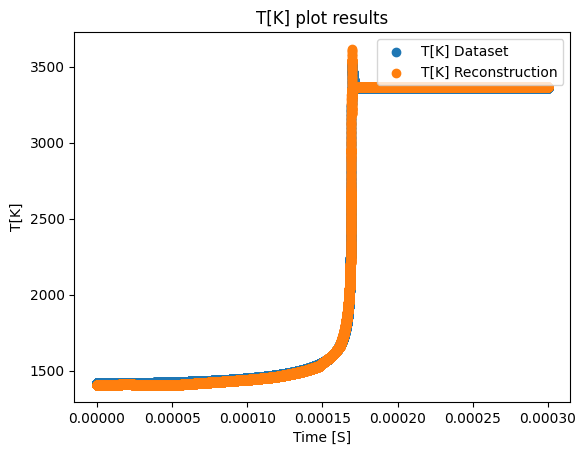

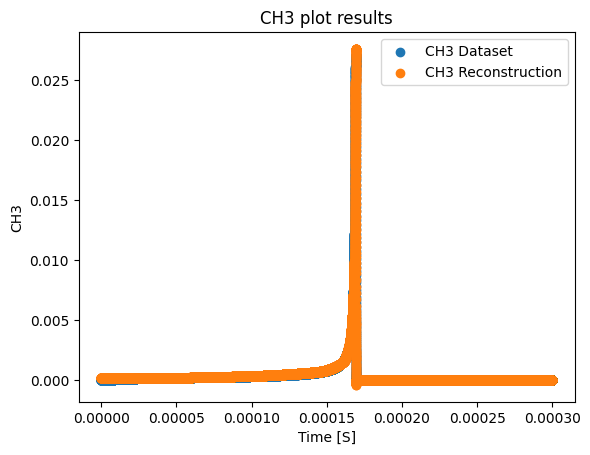

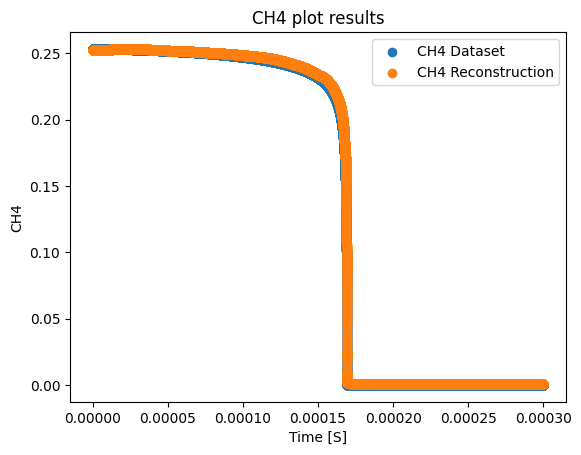

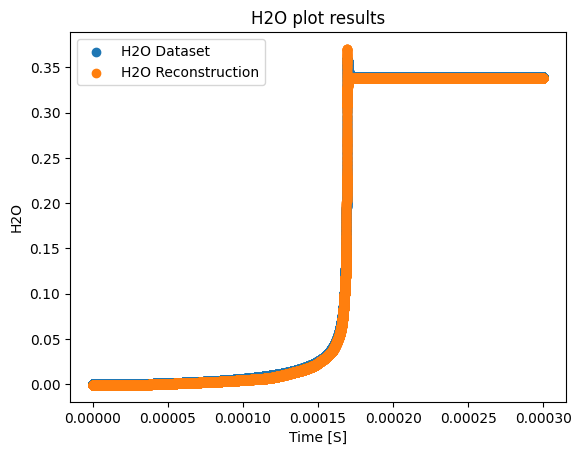

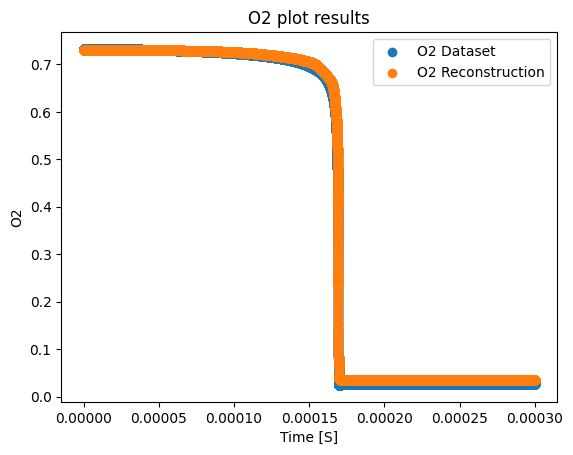

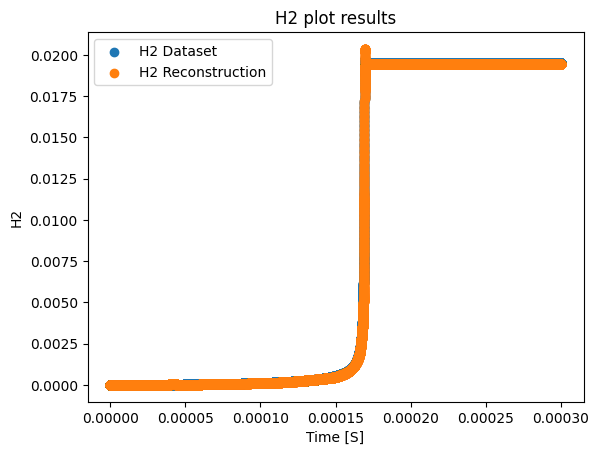

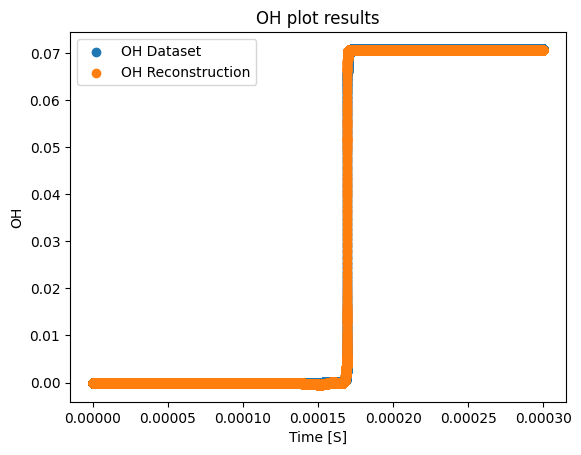

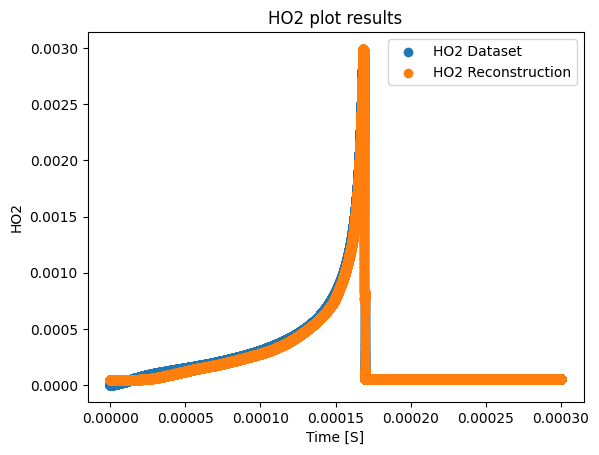

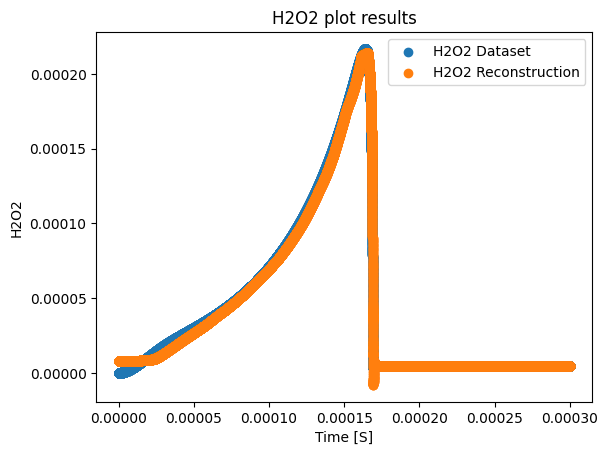

In [9]:
t_index=columns.index('t[s]shift')
t_trans=maximum_values.columns.get_loc('t[s]')
time_plot=(dataset.iloc[:,t_index])*maximum_values.iloc[0,t_trans]
    
for k in range(len(interest_vector)):
    original_index=columns.index(interest_vector[k]+'shift')
    #print(columns[original_index])
    results_index=columns.index(interest_vector[k]) #minues one due to the time column presence 
    #print(columns[results_index])
    #print(results_index-1)
    transformation_index=maximum_values.columns.get_loc(interest_vector[k])
    plot_name=interest_vector[k]+'.png'
    
    input_label=interest_vector[k]+' Dataset'
    output_label=interest_vector[k]+' Reconstruction'
    
    original=(dataset.iloc[:,original_index]).to_numpy()
    #original=original*transformation_values[1,original_index]
    #original=original+transformation_values[0,original_index]
    #original=np.exp(original)-1
    original=original*maximum_values.iloc[0,transformation_index]
    
    output=(results[:,results_index-1])
    #output=output*transformation_values[1,results_index]
    #output=output+transformation_values[0,results_index]
    #output=np.exp(output)-1
    output=output*maximum_values.iloc[0,transformation_index]
    
    plt.figure(k)
    plt.scatter(time_plot,original, label=input_label)
    plt.scatter(time_plot,output, label=output_label)
    plt.title(interest_vector[k]+' plot results')
    plt.xlabel('Time [S]')
    plt.ylabel(interest_vector[k])
    plt.legend()

In [10]:
latent_space=Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy())).numpy()

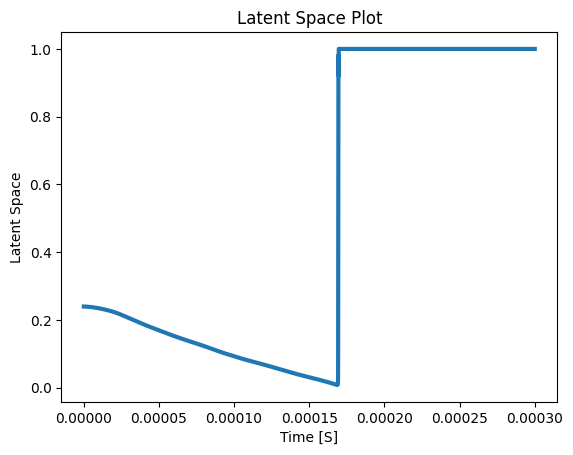

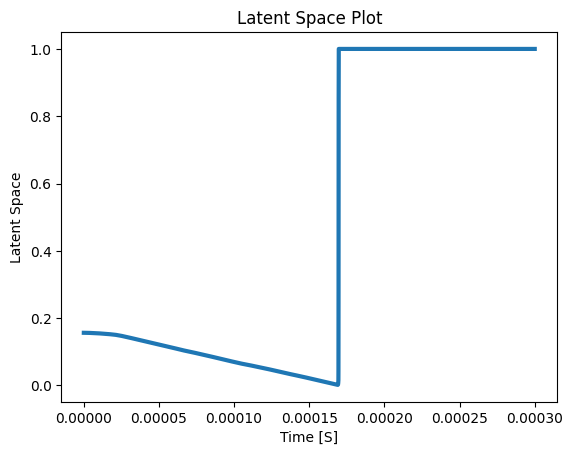

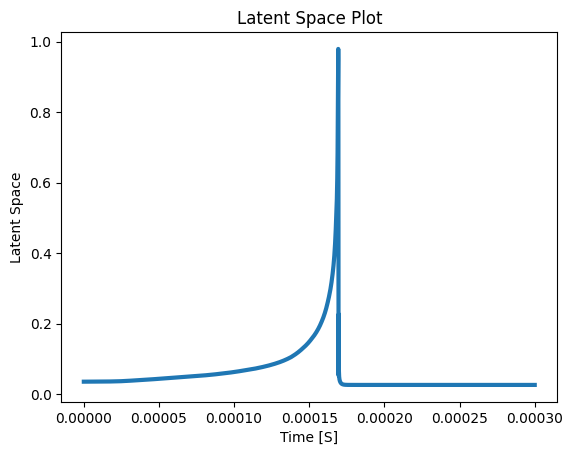

In [11]:
reduced_size=3

if reduced_size==1:
    plt.figure()
    plt.plot(time_plot,latent_space,linewidth=3)
    plt.title('Latent Space Plot')
    plt.xlabel('Time [S]')
    plt.ylabel('Latent Space')
else: 
    for i in range(reduced_size):
            plt.figure(i)
            plt.plot(time_plot,latent_space[:,i],linewidth=3)
            plt.title('Latent Space Plot')
            plt.xlabel('Time [S]')
            plt.ylabel('Latent Space')

In [12]:
corr_dataset=dataset.iloc[:,1:2+n_columns_mass_fraction+n_columns_source]
corr_columns=corr_dataset.columns.to_list()
corr_dataset

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.405009,3.659647e-11,1.697359e-09,3.972101e-11,0.815675,2.228141e-11,3.643286e-13,0.000001,1.660789e-09,5.007604e-35,...,9.508059e-10,6.455672e-29,2.470717e-17,2.570788e-18,1.586286e-08,1.336649e-05,-9.820509e-04,2.446278e-28,1.662416e-28,9.611106e-30
1,0.405009,1.415280e-10,3.223047e-09,1.492027e-10,0.815675,8.544666e-11,2.714306e-12,0.000003,6.639878e-09,2.455019e-33,...,3.678731e-09,1.067952e-27,9.984625e-17,1.717679e-17,3.223688e-08,1.378721e-05,-9.823392e-04,7.038622e-27,4.402985e-27,2.852145e-28
2,0.405009,3.079430e-10,4.595057e-09,3.152450e-10,0.815675,1.841636e-10,8.803947e-12,0.000004,1.493499e-08,4.594191e-32,...,8.007526e-09,5.460618e-27,2.270130e-16,5.253608e-17,4.911355e-08,1.419980e-05,-9.826272e-04,4.960549e-26,3.134093e-26,2.074772e-27
3,0.405009,5.296125e-10,5.829758e-09,5.264641e-10,0.815675,3.134510e-10,2.017469e-11,0.000005,2.654333e-08,-1.087724e-31,...,1.377610e-08,1.744797e-26,4.077867e-16,1.156523e-16,6.648191e-08,1.460247e-05,-9.829139e-04,1.954822e-25,1.272593e-25,8.421076e-27
4,0.405009,8.010152e-10,6.941697e-09,7.733375e-10,0.815675,4.687999e-10,3.813563e-11,0.000007,4.146212e-08,2.042214e-31,...,2.084083e-08,4.239619e-26,6.437010e-16,2.121704e-16,8.432919e-08,1.499383e-05,-9.831988e-04,5.588895e-25,3.777571e-25,2.477446e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.959579,1.298923e+00,1.141297e+00,3.872362e-01,0.030428,7.065549e-01,9.792776e-01,0.013797,1.792550e-02,3.229204e-06,...,8.298637e-21,3.672797e-22,1.169096e-22,2.398947e-25,1.037975e-26,8.746861e-29,9.369335e-31,4.538071e-21,1.655127e-21,1.374524e-22
119995,0.959579,1.298923e+00,1.141297e+00,3.872362e-01,0.030428,7.065549e-01,9.792776e-01,0.013797,1.792550e-02,3.229204e-06,...,6.771570e-21,4.172268e-22,1.166420e-22,2.477541e-25,9.465298e-27,9.253591e-29,8.863096e-31,4.804737e-21,1.812540e-21,1.261494e-22
119996,0.959579,1.298923e+00,1.141297e+00,3.872362e-01,0.030428,7.065549e-01,9.792776e-01,0.013797,1.792550e-02,3.229204e-06,...,6.547800e-21,4.055159e-22,1.164384e-22,2.461717e-25,9.437008e-27,9.326453e-29,7.713420e-31,4.367029e-21,1.699297e-21,1.508574e-22
119997,0.959579,1.298923e+00,1.141297e+00,3.872362e-01,0.030428,7.065549e-01,9.792776e-01,0.013797,1.792550e-02,3.229204e-06,...,1.180334e-20,3.710229e-22,1.191071e-22,2.455387e-25,9.570378e-27,9.920507e-29,9.790478e-31,4.557621e-21,1.669945e-21,1.287255e-22


In [13]:
iterations=np.shape(corr_dataset)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes=np.zeros(iterations) #rows, columns
    corr_indexes=np.array([corr_indexes])
    
    for j in range(iterations):
        corr_indexes[:,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space)
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)
else: 
    
    corr_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes[k,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space[:,k])
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)

In [14]:
corr_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.188688,0.200241,0.200863,0.200861,-0.186438,0.200861,0.184445,-0.804679,-0.810219,0.178349,...,-0.863417,-0.884752,-0.886683,-0.886713,-0.876883,-0.789001,-0.325744,-0.885595,-0.886044,-0.885928
1,0.194520,0.192289,0.192914,0.192912,-0.192259,0.192913,0.190260,-0.801922,-0.818740,0.184140,...,-0.871844,-0.895839,-0.896300,-0.896050,-0.885361,-0.797200,-0.332153,-0.896252,-0.896223,-0.896346
2,-0.150364,-0.217758,-0.218363,-0.218359,0.148172,-0.218358,-0.146231,0.811374,0.757379,-0.140288,...,0.807932,0.831331,0.831706,0.831457,0.821042,0.735283,0.287198,0.831707,0.831656,0.831674


CH4w    0.901045
O2w     0.885770
H       0.200863
OH      0.200861
O       0.200861
Name: 0, dtype: float64
CH4w    0.899407
O2w     0.896944
T[K]    0.194520
CO2     0.192917
H       0.192914
Name: 1, dtype: float64
CH3O    0.906284
CH3     0.906220
C2H5    0.905958
C2H3    0.905520
C2H4    0.905058
Name: 2, dtype: float64


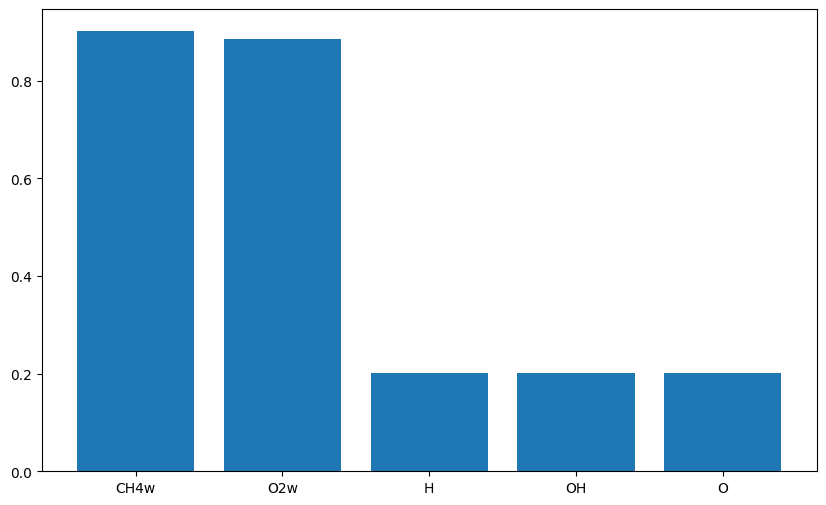

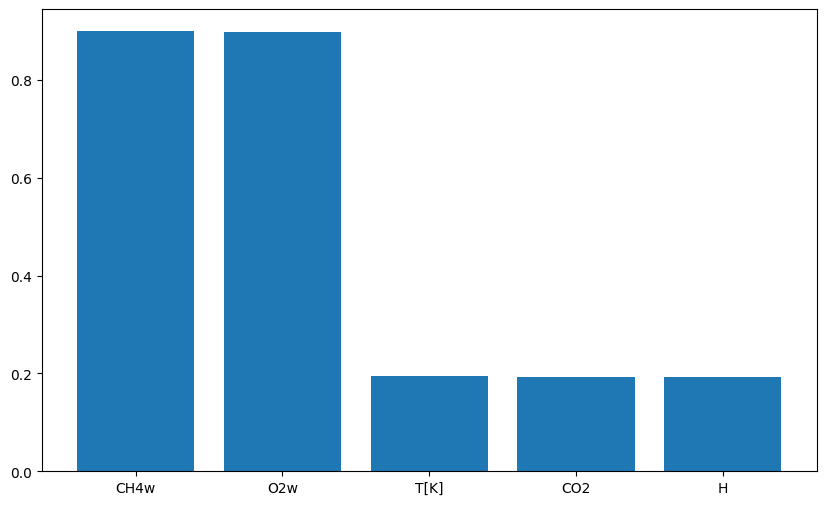

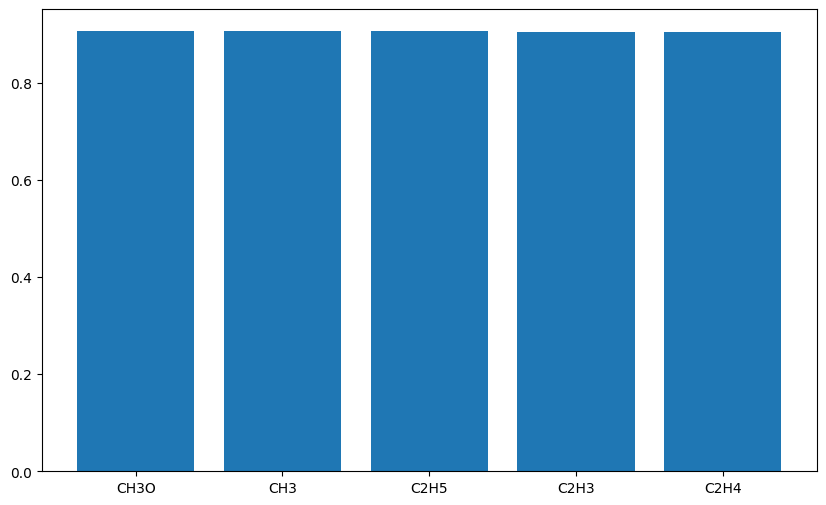

In [15]:
for m in range(reduced_size):
    
    indexes=corr_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [16]:
if reduced_size==1:
    spearman_indexes=np.zeros(iterations) #rows, columns
    spearman_indexes=np.array([spearman_indexes])
    
    for j in range(iterations):
        spearman_indexes[:,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space)
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)
else: 
    
    spearman_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            spearman_indexes[k,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space[:,k])
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)

In [17]:
spearman_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.576871,0.586183,0.586568,0.586568,-0.577758,0.586568,0.576536,-0.891995,-0.900286,0.564788,...,-0.917476,-0.948247,-0.949604,-0.949648,-0.935901,-0.918729,-0.357674,-0.948821,-0.949148,-0.949053
1,0.580659,0.581418,0.582232,0.582232,-0.581833,0.582232,0.580044,-0.890632,-0.905050,0.566626,...,-0.920060,-0.954523,-0.953777,-0.953426,-0.938502,-0.921373,-0.359818,-0.954476,-0.954124,-0.954368
2,-0.542059,-0.588305,-0.589492,-0.589492,0.545181,-0.589491,-0.541425,0.897017,0.864526,-0.528172,...,0.878256,0.912227,0.911442,0.911082,0.896367,0.879077,0.330280,0.912166,0.911795,0.911984


CH4w    0.958055
O2w     0.948249
H       0.586568
OH      0.586568
O       0.586568
Name: 0, dtype: float64
CH4w    0.957362
O2w     0.954825
CO2     0.582232
H       0.582232
OH      0.582232
Name: 1, dtype: float64
CH3O    0.962467
CH3     0.962354
C2H5    0.962129
C2H3    0.962047
C2H4    0.961701
Name: 2, dtype: float64


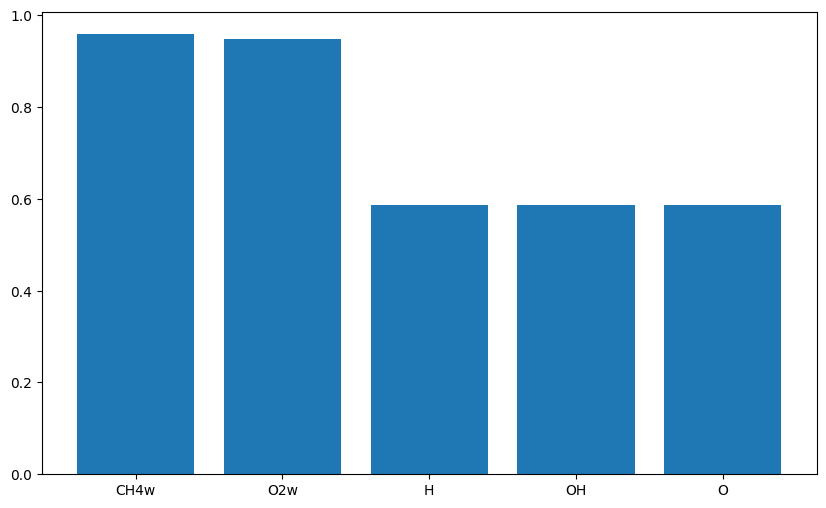

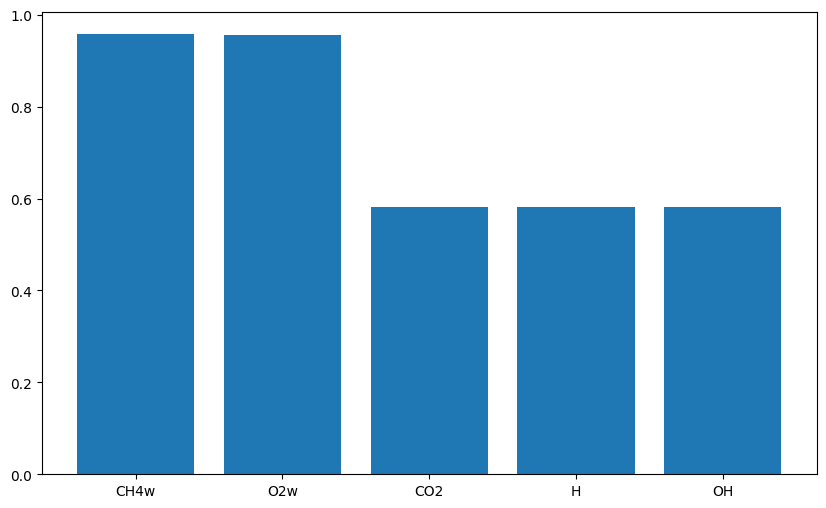

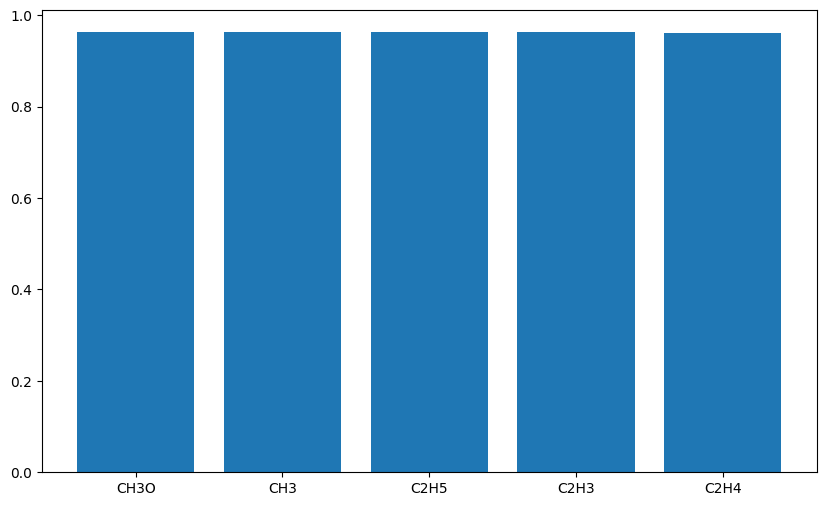

In [18]:
for m in range(reduced_size):
    
    indexes=spearman_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [19]:
n_samples=np.shape(latent_space)[0]

corr_dataset_=corr_dataset.iloc[1:,:]

latent_space_=latent_space[0:n_samples-1,:]

In [20]:
print(np.shape(corr_dataset_))
print(np.shape(latent_space_))

(119998, 61)
(119998, 3)


In [21]:
iterations=np.shape(corr_dataset_)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes_=np.zeros(iterations) #rows, columns
    corr_indexes_=np.array([corr_indexes_])
    
    for j in range(iterations):
        corr_indexes_[:,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_)
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)
else: 
    
    corr_indexes_=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes_[k,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_[:,k])
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)

In [22]:
corr_indexes_

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.188662,0.200234,0.200856,0.200853,-0.186414,0.200854,0.184421,-0.804716,-0.810206,0.178325,...,-0.863383,-0.884770,-0.886690,-0.886720,-0.876848,-0.788967,-0.325722,-0.885614,-0.886062,-0.885946
1,0.194494,0.192281,0.192907,0.192904,-0.192236,0.192905,0.190237,-0.801930,-0.818723,0.184116,...,-0.871809,-0.895818,-0.896266,-0.896017,-0.885326,-0.797164,-0.332137,-0.896230,-0.896201,-0.896325
2,-0.150336,-0.217755,-0.218359,-0.218356,0.148146,-0.218355,-0.146205,0.811378,0.757362,-0.140263,...,0.807898,0.831309,0.831673,0.831423,0.821009,0.735248,0.287187,0.831684,0.831633,0.831651


CH4w    0.901068
O2w     0.885777
H       0.200856
OH      0.200854
O       0.200853
Name: 0, dtype: float64
CH4w    0.899430
O2w     0.896968
T[K]    0.194494
CO2     0.192909
H       0.192907
Name: 1, dtype: float64
CH3O    0.906296
CH3     0.906217
C2H5    0.905946
C2H3    0.905526
C2H4    0.905047
Name: 2, dtype: float64


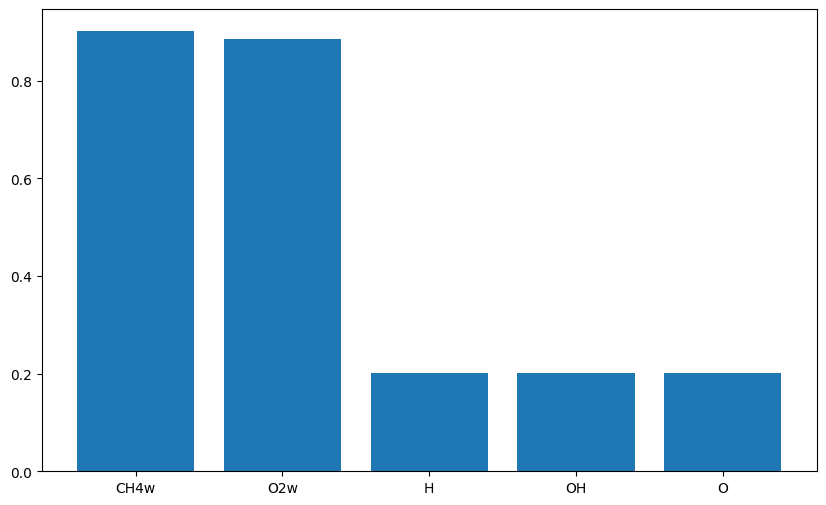

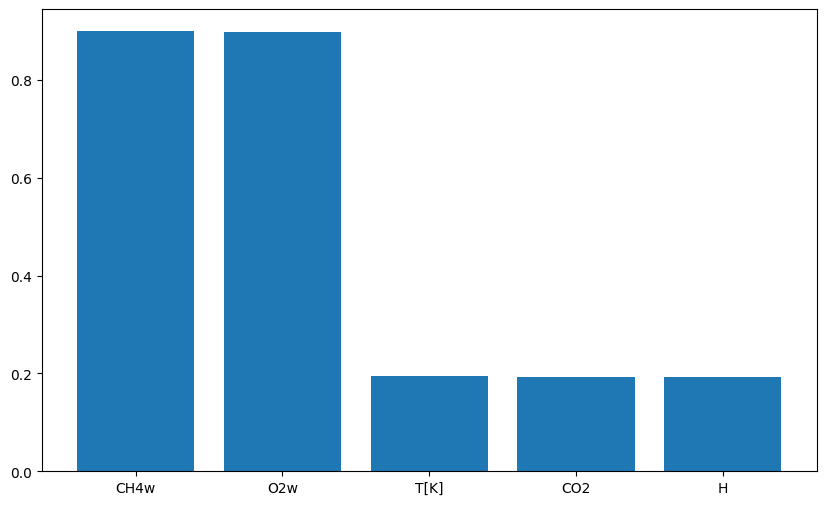

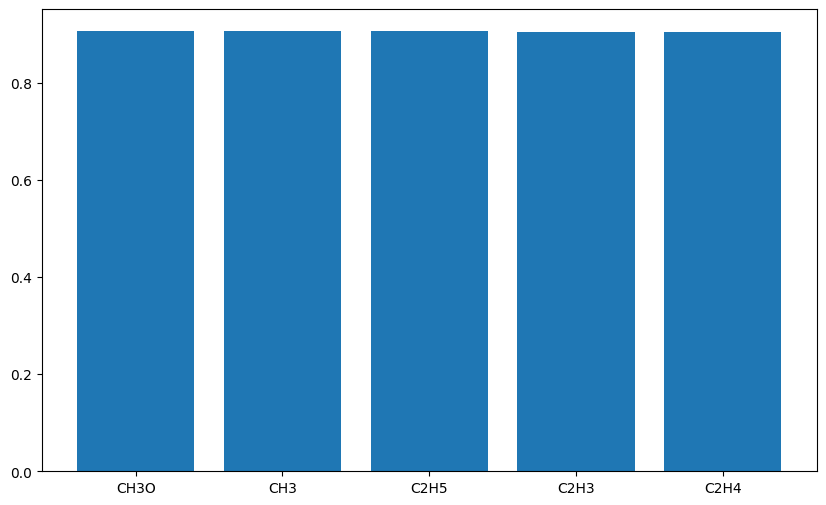

In [23]:
for m in range(reduced_size):
    
    indexes=corr_indexes_.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)